# Pymaceuticals Inc.
---

### Analysis

1. Capomulin and Ramicane had the lowest Mean, Median, Variance, Standard Deviation, and Standard Error in Tumor Volume, with Ramicane just slightly out performing Capomulin.
2. Capomulin had the most mice tested across the Drug Regimens with Ramicane just behind.
3. Infubinol appears to have a potential outlier in their Tumor Volumes, this appears to be because there are some mice that did not make it all the way through the 45 periods of trial.
4. There appears to be a strong positive correlation (0.84) between the mouse weight (g) and the average tumor volume. There should be further analysis to determine causal relationship.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df  = pd.merge(study_results,mouse_metadata,how='left',on=['Mouse ID'])
# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = merged_df['Mouse ID'].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'],keep=False)].reset_index(drop=True)
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_id = merged_df[merged_df['Mouse ID'] == duplicates.iloc[0,0]]
dup_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[~merged_df['Mouse ID'].isin(dup_id['Mouse ID'])].reset_index(drop=True)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df['Mouse ID'].nunique()
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_group_mean = clean_df.groupby('Drug Regimen').mean(numeric_only=True)['Tumor Volume (mm3)'].to_frame(name='Mean Tumor Volume')
drug_group_median = clean_df.groupby('Drug Regimen').median(numeric_only=True)['Tumor Volume (mm3)'].to_frame(name='Median Tumor Volume')
drug_group_var = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'].to_frame(name='Tumor Volume Variance')
drug_group_stdev = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'].to_frame(name='Tumor Volume Std. Dev.')
drug_group_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'].to_frame(name='Tumor Volume Std. Err.')

drug_multi_group = pd.concat([drug_group_mean,drug_group_median,drug_group_var,drug_group_stdev,drug_group_sem],axis=1)

drug_multi_group

/var/folders/k7/5f0qdfrj5kx5txr7tg8xx_cc0000gn/T/ipykernel_88824/2505460041.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_group_var = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'].to_frame(name='Tumor Volume Variance')
/var/folders/k7/5f0qdfrj5kx5txr7tg8xx_cc0000gn/T/ipykernel_88824/2505460041.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_group_stdev = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'].to_frame(name='Tumor Volume Std. Dev.')
/var/folders/k7/5f0qdfrj5kx5txr7tg8xx_cc0000gn/T/ipykernel_88824/2505460041.py:10: FutureWarning: The default value of nume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
#clean_df_grouped = clean_df.groupby('Drug Regimen')
drug_single_agg = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std','sem']})
drug_single_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

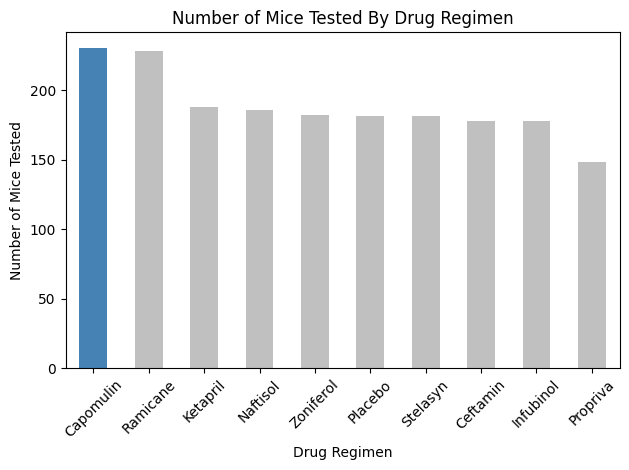

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Set colors for Drug Regimen to highlight top 2 regimens
my_colors = ['steelblue', 'silver','silver','silver','silver','silver','silver','silver','silver','silver']

drug_timepoint_df = clean_df.groupby('Drug Regimen')['Timepoint'].count().reset_index().sort_values('Timepoint', ascending=False).reset_index(drop=True)

drug_timepoint_df.plot(kind='bar',legend=False, title='Number of Mice Tested By Drug Regimen',rot=45, ylabel='Number of Mice Tested',x='Drug Regimen',y='Timepoint',color=my_colors)
plt.tight_layout()
plt.show()

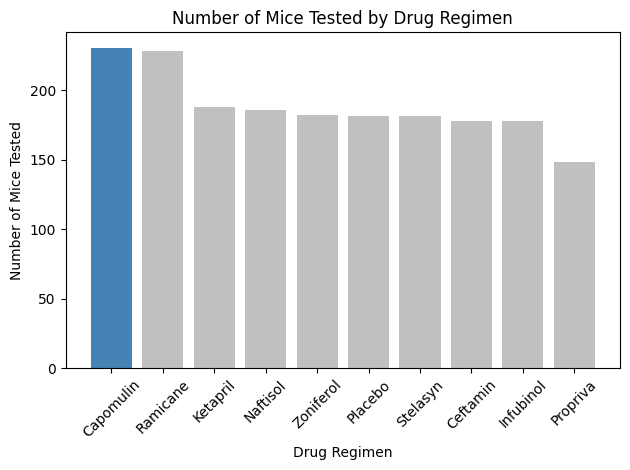

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.#
pyplot_df = clean_df.groupby('Drug Regimen')['Timepoint'].count().reset_index().set_index('Drug Regimen').sort_values('Timepoint', ascending=False)
x_axis_bar = list(pyplot_df.index)
plt.bar(x_axis_bar,pyplot_df['Timepoint'], color=my_colors)
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Number of Mice Tested by Drug Regimen')
plt.tight_layout()
plt.show()


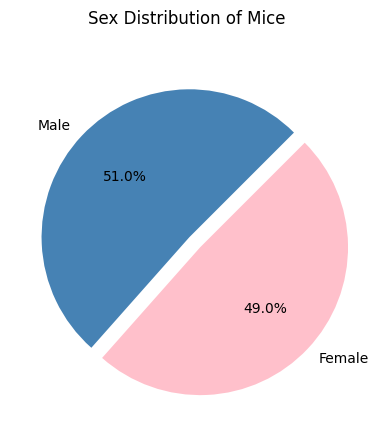

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_df = clean_df.groupby('Sex')['Mouse ID'].count().reset_index().sort_values('Mouse ID', ascending=False).set_index('Sex')
mice_gender_df.plot(kind='pie', subplots=True,autopct='%1.1f%%', legend=False, colors=['steelblue','pink'], title='Sex Distribution of Mice', startangle=45, ylabel='', explode=[0.05,0.05])
plt.show()

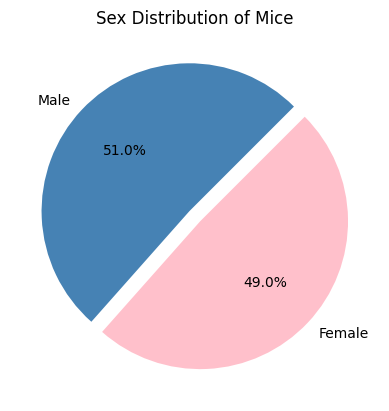

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x=mice_gender_df['Mouse ID'], autopct='%1.1f%%', labels=mice_gender_df.index, colors=['steelblue','pink'], startangle=45, explode=[0.05,0.05])
plt.title('Sex Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
groupby_df = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint - techicnally not necessary the way I did the original append.
merged_last_tp_gb = pd.merge(groupby_df, clean_df, how='inner', on=['Mouse ID','Timepoint'])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_reg_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = [pd.Series(merged_last_tp_gb.loc[merged_last_tp_gb['Drug Regimen'] == regimen, 'Tumor Volume (mm3)'], name=regimen) for regimen in drug_reg_list]
tumor_vol_list_indexed = [series.reset_index(drop=True) for series in tumor_vol_list]    
tumor_df = pd.concat(tumor_vol_list_indexed, axis=1)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quants = [0.25,0.5,0.75]
stats_df = pd.DataFrame()

for index, regimen in enumerate(drug_reg_list):
    temp_quartiles = tumor_vol_list[index].quantile(quants)
    lower_q = temp_quartiles[quants[0]]
    upper_q = temp_quartiles[quants[-1]]
    iqr = upper_q - lower_q
    lower_b = lower_q - (1.5 * iqr)
    upper_b = upper_q + (1.5 * iqr)

    temp_df = pd.DataFrame({
        'Drug Regimen': regimen,
        'Lower Quartile': lower_q,
        'Upper Quartile': upper_q,
        'IQR': iqr,
        'Lower Bound': lower_b,
        'Upper Bound': upper_b
    }, index=[0])
    stats_df = pd.concat([stats_df, temp_df])
stats_df.set_index('Drug Regimen', inplace=True)
    # Locate the rows which contain mice on each drug and get the tumor volumes
outliers = [tumor_vol_list[r].loc[(tumor_vol_list[r] < stats_df.loc[v,'Lower Bound']) |(tumor_vol_list[r] > stats_df.loc[v,'Upper Bound'])] for r, v in enumerate(drug_reg_list)]
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
display(stats_df)
display(tumor_df)
for outlier, name in enumerate(outliers):
    print(f"{name.name}'s potential outliers: {name}")

,Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound
Drug Regimen,,,,,
Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


Capomulin's potential outliers: Series([], Name: Capomulin, dtype: float64)
Ramicane's potential outliers: Series([], Name: Ramicane, dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Infubinol, dtype: float64
Ceftamin's potential outliers: Series([], Name: Ceftamin, dtype: float64)


<AxesSubplot: >

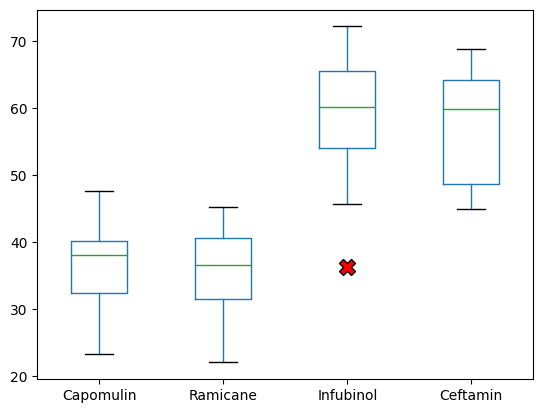

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_df.boxplot(grid=False,flierprops=dict(marker='X', markerfacecolor='r', markersize=12))

## Line and Scatter Plots

,Mouse ID,Timepoint,Tumor Volume (mm3)
234,v923,0,45.000000
336,v923,5,45.704434
516,v923,10,39.848223
905,v923,15,40.457989
1016,v923,20,39.648296
1221,v923,25,40.156413
1289,v923,30,40.752216
1603,v923,35,41.439242
1670,v923,40,42.151015
1808,v923,45,40.658124


<AxesSubplot: title={'center': 'Capomulin treatement of mouse v923'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

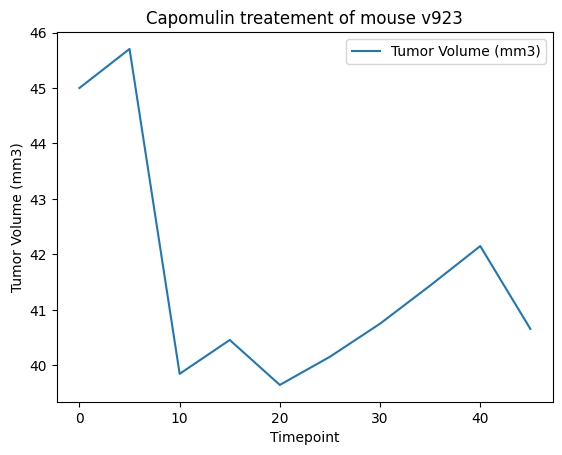

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
import random
mouse_ids = clean_df['Mouse ID'].loc[clean_df['Drug Regimen'] == "Capomulin"].unique().tolist()
random_id = mouse_ids[random.randint(0,len(mouse_ids)-1)]
rand_mouse_df = clean_df[clean_df['Mouse ID'] == random_id][['Mouse ID','Timepoint', 'Tumor Volume (mm3)']]
display(rand_mouse_df)
rand_mouse_df.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', title=f'Capomulin treatement of mouse {random_id}',ylabel='Tumor Volume (mm3)')


/var/folders/k7/5f0qdfrj5kx5txr7tg8xx_cc0000gn/T/ipykernel_88824/1365325904.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_df_avg = clean_df[clean_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()


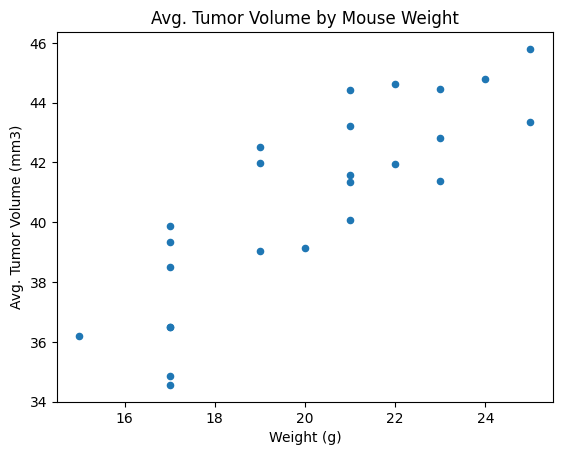

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_df_avg = clean_df[clean_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()
mouse_df_avg.plot(kind='scatter',  x='Weight (g)', y='Tumor Volume (mm3)', title=f'Avg. Tumor Volume by Mouse Weight', ylabel='Avg. Tumor Volume (mm3)' )
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


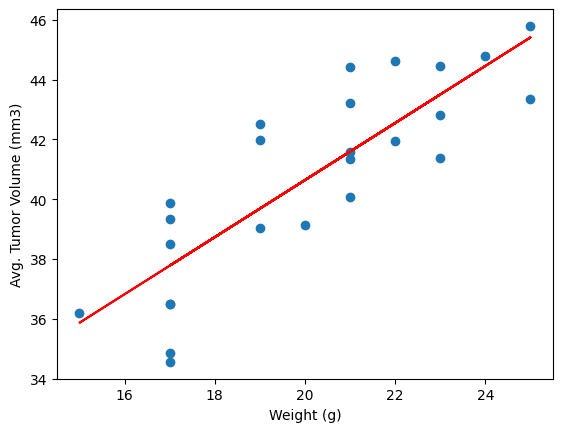

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(mouse_df_avg['Weight (g)'], mouse_df_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

plt.scatter(mouse_df_avg['Weight (g)'],mouse_df_avg['Tumor Volume (mm3)'])

line = np.polyfit(mouse_df_avg['Weight (g)'], mouse_df_avg['Tumor Volume (mm3)'],1)
linear_reg = np.poly1d(line)

plt.plot(mouse_df_avg['Weight (g)'], linear_reg(mouse_df_avg['Weight (g)']), color='r')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()